In [18]:
import requests
response = requests.get(url='https://store.steampowered.com/appreviews/413150?json=1').json()

In [19]:
#Loading in anything required
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import cluster
from sklearn import preprocessing
import json
from scipy import stats
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from bs4 import BeautifulSoup

In [20]:
import requests

def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [21]:
import requests

def get_name(appid, params={'json':1}):
        url = 'https://store.steampowered.com/api/appdetails?appids='
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [22]:
def get_n_reviews(appid, n=1000):
    reviews = []
    cursor = '*'
    params = {
            'json' : 1,
            'filter' : 'all',
            'language' : 'english',
            'day_range' : 365,
            'review_type' : 'all',
            'purchase_type' : 'all'
            }

    while n > 0:
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [23]:
def get_n_appids(n=2, filter_by=''):
    appids = []
    url = f'https://store.steampowered.com/search/?sort_by=Reviews_DESC&category1=998&supportedlang=english&page=2&ndl=1'
    page = 0

    while page*25 < n:
        page += 1
        response = requests.get(url=url+str(page), headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, 'html.parser')
        for row in soup.find_all(class_='search_result_row'):
            appids.append(row['data-ds-appid'])

    return appids[:n]

In [26]:
import requests

def get_details(appid, params={'json':1}):
        url = 'https://store.steampowered.com/api/appdetails?appids='
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [27]:
gamelist = get_n_appids()
gamelist

['294100', '400']

In [31]:
for i in gamelist:
    print(get_details(i)[i]['data'])

{'type': 'game', 'name': 'RimWorld', 'steam_appid': 294100, 'required_age': 0, 'is_free': False, 'dlc': [1826140, 1149640, 1392840, 367680, 990430, 1244270], 'detailed_description': '<strong>RimWorld is a sci-fi colony sim driven by an intelligent AI storyteller.</strong> Inspired by Dwarf Fortress, Firefly, and Dune.<br><br><strong>You begin with three survivors of a shipwreck on a distant world.</strong><br><ul class="bb_ul"><li>Manage colonists\' moods, needs, wounds, illnesses and addictions.<br></li><li>Build in the forest, desert, jungle, tundra, and more.<br></li><li>Watch colonists develop and break relationships with family members, lovers, and spouses.<br></li><li>Replace wounded limbs and organs with prosthetics, bionics, or biological parts harvested from others.<br></li><li>Fight pirates, tribes, mad animals, giant insects and ancient killing machines.<br></li><li>Craft structures, weapons, and apparel from metal, wood, stone, cloth, and futuristic materials.<br></li><li>T

{'type': 'game', 'name': 'Portal', 'steam_appid': 400, 'required_age': 0, 'is_free': False, 'dlc': [323170, 2012840], 'detailed_description': "<p>Portal&trade; is a new single player game from Valve. Set in the mysterious Aperture Science Laboratories, Portal has been called one of the most innovative new games on the horizon and will offer gamers hours of unique gameplay.</p>\r\n\t\t\t\t\t<p>The game is designed to change the way players approach, manipulate, and surmise the possibilities in a given environment; similar to how Half-Life&reg; 2's Gravity Gun innovated new ways to leverage an object in any given situation.</p>\r\n\t\t\t\t\t<p>Players must solve physical puzzles and challenges by opening portals to maneuvering objects, and themselves, through space.</p>\r\n\t\t\t\t\t", 'about_the_game': "<p>Portal&trade; is a new single player game from Valve. Set in the mysterious Aperture Science Laboratories, Portal has been called one of the most innovative new games on the horizon a

In [40]:
get_details('10')['10']['data']['recommendations']

{'total': 128997}

In [82]:
get_details('10')['10']['data']['price_overview']

{'currency': 'THB',
 'initial': 18900,
 'final': 18900,
 'discount_percent': 0,
 'initial_formatted': '',
 'final_formatted': '฿189.00'}

In [81]:
get_reviews('10')['query_summary']

{'num_reviews': 20,
 'review_score': 9,
 'review_score_desc': 'Overwhelmingly Positive',
 'total_positive': 25552,
 'total_negative': 883,
 'total_reviews': 26435}

In [42]:
df = pd.DataFrame()
df = df.append(get_details('10')['10']['data']['recommendations'], ignore_index=True, sort=False)
df

C:\Users\Sasha\AppData\Local\Temp\ipykernel_3536\3602995646.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(get_details('10')['10']['data']['recommendations'], ignore_index=True, sort=False)


,total
0,129003


In [44]:
for keys in get_reviews('10'):
    print(keys)

success
query_summary
reviews
cursor


In [79]:
get_reviews('10')['reviews']

[{'recommendationid': '125051684',
  'author': {'steamid': '76561198832888311',
   'num_games_owned': 52,
   'num_reviews': 15,
   'playtime_forever': 20,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 16,
   'last_played': 1667747180},
  'language': 'english',
  'review': 'joining a server is like russian roulette',
  'timestamp_created': 1667747128,
  'timestamp_updated': 1667747128,
  'voted_up': True,
  'votes_up': 71,
  'votes_funny': 27,
  'weighted_vote_score': '0.865129530429840088',
  'comment_count': 0,
  'steam_purchase': True,
  'received_for_free': False,
  'written_during_early_access': False,
  'hidden_in_steam_china': True,
  'steam_china_location': ''},
 {'recommendationid': '125311713',
  'author': {'steamid': '76561198973622521',
   'num_games_owned': 56,
   'num_reviews': 8,
   'playtime_forever': 114,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 114,
   'last_played': 1663171392},
  'language': 'english',
  'review': ' ⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⠛⠛⠋⠉⠈⠉⠉⠉⠉⠛⠻

In [48]:
df = pd.DataFrame(get_n_reviews('10'))
df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,112566004,"{'steamid': '76561198010006564', 'num_games_ow...",english,Sometimes you will never know the value of a m...,1647816784,1647816784,True,110,2,0.912584066390991211,0,False,False,False,False,
1,107374038,"{'steamid': '76561198311106723', 'num_games_ow...",english,One of the best games of our childhood. I don'...,1641388133,1641388133,True,135,8,0.902691423892974854,0,True,False,False,False,
2,120434291,"{'steamid': '76561198385068308', 'num_games_ow...",english,Players who's still play this game:\n⣿⣿⣿⣿⣿⣿⣿⣿⡿...,1660209679,1660209679,True,105,26,0.88371509313583374,0,True,False,False,False,
3,116355590,"{'steamid': '76561198973963706', 'num_games_ow...",english,people who still play this game\n⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⠛⠛...,1654127826,1654127826,True,116,30,0.869272410869598389,3,True,False,False,False,
4,125051684,"{'steamid': '76561198832888311', 'num_games_ow...",english,joining a server is like russian roulette,1667747128,1667747128,True,71,27,0.865129530429840088,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,106646944,"{'steamid': '76561199124150046', 'num_games_ow...",english,This game will never die.,1640598491,1640598491,True,1,0,0.5,0,True,False,False,False,
685,106308620,"{'steamid': '76561198835873246', 'num_games_ow...",english,simplesmente o melhor FPS DO BRASIL BRASILEIRO,1640203067,1640203067,True,1,0,0.5,0,True,False,False,False,
686,106006631,"{'steamid': '76561199055483317', 'num_games_ow...",english,boring,1639790016,1639790016,True,1,1,0.5,0,True,False,False,False,
687,105441574,"{'steamid': '76561198095459184', 'num_games_ow...",english,Best damn shooter out there! Enjoy this with y...,1638931003,1638931003,True,1,0,0.5,0,True,False,False,False,


In [59]:
X = df[['steam_purchase', 'received_for_free', 'weighted_vote_score']].to_numpy()
X

array([[False, False, '0.912584066390991211'],
       [True, False, '0.902691423892974854'],
       [True, False, '0.88371509313583374'],
       ...,
       [True, False, '0.5'],
       [True, False, '0.5'],
       [True, False, '0.5']], dtype=object)

In [60]:
Y = df['voted_up'].to_numpy()
Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

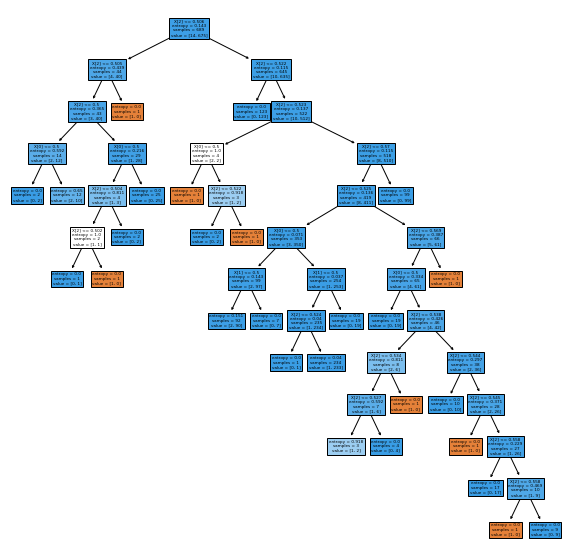

In [69]:
plt.figure(figsize=(10,10))
game_dt = DecisionTreeClassifier(criterion='entropy')
game_dt.fit(X,Y)
plot_tree(game_dt, filled=True)
plt.show()